# Galaxia: Generating synthetic surveys

## Parameters/outputs: 

For files named testLOS1arcsec_*, they are contained in the file $\texttt{testLOS10arcsecparameters}$, which is also located in /u/casey_lam/scratch. Here we considered the same line of sight to the particular OGLE event. The idea was to consider a patch 10'' x 10''. However, when I ran it, there was an error because 0 stars were generated. I next ran it as 1'' x  1'', and only got one star. So I ended up running it as a 1' x 1' patch, and that gave me 38 stars.

The relevant outputs are 3D position, proper motions, and brightness at several particular filters (probably R and K band.)

## Proper motions (in direction of OGLE-2017-BLG-0019)

Calculating l and b from RA and Dec for OGLE-2017-BLG-0019:

RA (J2000.0):17:52:18.74

Dec (J2000.0):-33:00:04.0

Converting into degrees: 

17 hours 52 minutes 18.74 seconds =  (17 + (52/60) + (18.74/3600))*15  deg = 268.078083 deg

-33 degrees 00 minutes 04 seconds = -(33 + (4/3600)) deg =  -33.00111 deg

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import astropy.units as u
import astropy.coordinates as coord

In [4]:
#convert from RA and Dec to l and b
#b is latitude, l is longitude
c = coord.SkyCoord(ra = [268.078083]*u.degree, dec = [-33.00111]*u.degree, frame='fk5')
c.galactic

<SkyCoord (Galactic): (l, b) in deg
    [( 357.25017714, -3.32067241)]>

In [6]:
#load px, py, pz (cartesian heliocentric coordinates) from galaxia
HCxOGLE = np.loadtxt("testLOS1arcsec_px") #kpc
HCyOGLE = np.loadtxt("testLOS1arcsec_py") #kpc
HCzOGLE = np.loadtxt("testLOS1arcsec_pz") #kpc

#load vx, vy, vz (cartesian heliocentric velocities) from galaxia
HCxvelOGLE = np.loadtxt("testLOS1arcsec_vx") #km/s
HCyvelOGLE = np.loadtxt("testLOS1arcsec_vy") #km/s
HCzvelOGLE = np.loadtxt("testLOS1arcsec_vz") #km/s

#load soun velocities
sun = np.loadtxt("testLOS1arcsec_center")
v_sun = sun[3:6]*u.km/u.s

In [10]:
HCcoords = coord.SkyCoord(x=HCxOGLE, y=HCyOGLE, z=HCzOGLE, unit='kpc', representation='cartesian')
HCcoords.galactic

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, kpc)
    [( 88.15810095, -61.9014214 ,  11.22324505),
     ( 88.15830662, -61.90121879,   4.40434878),
     ( 88.15794349, -61.90134635,   6.57643629),
     ( 88.15795106, -61.90124703,   6.58397989),
     ( 88.15784935, -61.90126633,   6.6904976 ),
     ( 88.15843061, -61.90138368,   6.71305524),
     ( 88.15812506, -61.90122474,   6.74592768),
     ( 88.15807806, -61.90142377,   6.81632182),
     ( 88.1583886 , -61.90127274,   7.17045066),
     ( 88.15810659, -61.90118018,   7.60575242),
     ( 88.15804094, -61.90130331,   7.68845031),
     ( 88.15826851, -61.90130518,   7.72883673),
     ( 88.15816076, -61.9013204 ,   7.90822154),
     ( 88.15825322, -61.90130888,   7.9519869 ),
     ( 88.15815563, -61.90133145,   8.00432578),
     ( 88.15803673, -61.90131932,   8.05169051),
     ( 88.15798744, -61.90118609,   8.26082369),
     ( 88.1580221 , -61.90132479,   8.28970574),
     ( 88.15797108, -61.9011992 ,   8.51099357),
     ( 88.1

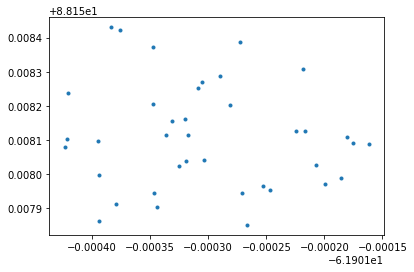

In [11]:
plt.plot(HCcoords.galactic.b, HCcoords.galactic.l, '.')
plt.show()

In [24]:
#comes directly from http://gala-astro.readthedocs.io/en/latest/coordinates/

xyz = [[  6.47945349,-34.4772621 ], [-17.77019357,  31.11681441],[-25.32101661,   3.54273331]] * u.kpc
vxyz = [[-184.32952533,   76.94467146], [ -19.19375771,  -98.15603007],[  22.49696323,   26.35110153]] * u.km/u.s
v_sun = coord.CartesianDifferential([10, 250., 7] * u.km/u.s)
gc = coord.Galactocentric(x=xyz[0], y=xyz[1], z=xyz[2],v_x=vxyz[0], v_y=vxyz[1], v_z=vxyz[2],galcen_distance=8*u.kpc,galcen_v_sun=v_sun)


In [26]:
HCxOGLE = HCxOGLE * u.kpc
HCyOGLE = HCyOGLE * u.kpc
HCzOGLE = HCzOGLE * u.kpc

HCxvelOGLE = HCxvelOGLE * u.km/u.s
HCyvelOGLE = HCyvelOGLE * u.km/u.s
HCzvelOGLE = HCzvelOGLE * u.km/u.s

sunvel = coord.CartesianDifferential(sun[3:6]) * u.km/u.s

gc = coord.Galactocentric(x=HCxOGLE, y=HCyOGLE, z=HCzOGLE, v_x=HCxvelOGLE, v_y=HCyvelOGLE, v_z=HCzvelOGLE, galcen_distance = sun[0] * u.kpc, galcen_v_sun = sunvel)
icrs = gc.transform_to(coord.ICRS)
icrs.pm_ra_cosdec

ValueError: For differential object '<CartesianDifferential (d_x, d_y, d_z) in km9 / s9
    [(-122.31252289, -338.72213745,   46.90854645),
     ( -83.30236816,   82.31020355,   93.09341431),
     (   8.14424229,  -67.1520462 ,  -16.2996769 ),
     ( 278.84332275, -151.00671387,  -26.38014412),
     (  76.53701782, -253.12597656,  -44.90016174),
     (  50.00233459,   10.43029881,   52.00296783),
     (  11.00264263, -318.93737793,  102.09288788),
     ( -49.33816528,  -22.50930023,  -34.09093857),
     ( 129.44998169, -186.76148987,  -69.8518219 ),
     (-113.30675507, -349.54476929,  -81.94290924),
     ( -77.93921661, -191.98399353,   16.10504532),
     ( -68.40061188, -368.27539062,  -80.71481323),
     ( -34.13563538, -171.51763916,  140.82226562),
     (  19.54314613, -246.67497253,  165.68800354),
     (  -6.63549757, -122.05953979,   -1.00854611),
     (  18.3990345 , -201.19708252,   -7.2511754 ),
     (  38.58768463, -233.54554749,  -41.88350677),
     ( 130.77833557, -167.1582489 ,  187.03181458),
     ( -51.12487411, -251.2689209 ,  -56.74548721),
     ( -69.86824799, -128.6317749 ,  -55.86848068),
     (-134.18066406, -396.10494995,  -74.1415329 ),
     ( -43.83417892, -219.47103882, -173.72262573),
     (-178.11027527, -295.53213501, -164.28045654),
     (  73.78585052, -260.53271484,  -50.08070755),
     (-201.02905273, -279.53018188,  -56.25963974),
     (  17.88349724, -259.3531189 , -207.01045227),
     (-165.48735046,  -53.29598999,   67.28723907),
     (  23.93867111, -188.36317444, -202.75379944),
     (  67.42604065, -501.48825073,  -49.86851883),
     ( -33.08475494, -213.98857117,  -66.39907074),
     (-151.85180664, -313.02844238, -162.84928894),
     ( -19.78683662, -515.65423584, -104.47255707),
     ( -76.87848663, -461.10491943,   76.64383698),
     (  76.11129761, -323.46063232,  -71.52612305),
     (   1.22940111, -372.40313721,  -86.5480957 ),
     (-209.67965698, -407.53283691,  143.26940918),
     (  11.36571789, -436.93762207,    4.33625031),
     (  -6.24751806, -439.06192017,  -78.93412018)]>', expected unit key = 's9' but received key = 's'